## 노트북 목차
---
### 파트1: 탐색적 데이터 분석(EDA)
1) 특성 분석  
2) 여러 특성을 고려한 관계 또는 트렌드 찾기   

### 파트2: Feature Engineering 및 데이터 정제
1) 새로운 특성 추가하기  
2) 중복 특성 제거하기  
3) 모델링에 적합한 형태로 특성 변환하기  

### 파트3: 모델링 예측
1) 기본적인 알고리즘  
2) 교차 검증  
3) 앙상블 기법  
4) 중요한 특징 추출  

## 파트1: 탐색적 데이터 분석(EDA)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
data = pd.read_csv('C:/Users/battl/PycharmProjects/cse_project/coding practice/Kaggle/Titanic/train.csv')

In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId : 탑승객의 고유 아이디  
Survival : 생존유무(0: 사망, 1: 생존)  
Pclass : 선실의 등급  
Name : 이름  
Sex : 성별  
Age : 나이  
Sibsp : 함께 탑승한 형제자매, 아내 남편의 수  
Parch: 함께 탑승한 부모, 자식의 수  
Ticket: 티켓번호  
Fare: 티켓의 요금  
Cabin: 객실번호  
Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)  

In [78]:
data.isnull().sum() # 결측치 개수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

얼마나 많이 살아남았는지 그래프를 통해 확인해보자.

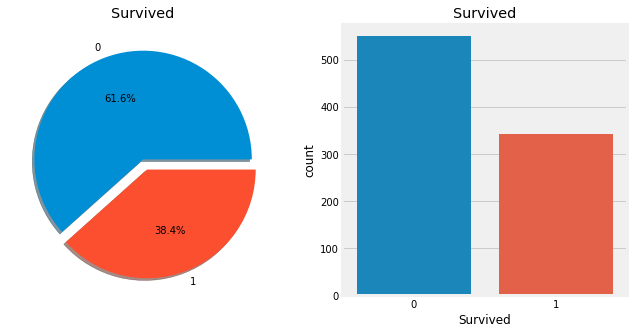

In [79]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 그래프를 통해 훈련셋에 탑승한 891명 중 350명만이 생존하였음을 확인할 수 있다. 더 나아가 데이터에서 생존하지 못한 승객을 파악할 수 있는 많은 정보를 조사해야 한다. 이는 통찰력(Insight)을 얻기 위함이다.

* 데이터셋에서 서로 다른 특성들을 사용하여 생존율을 확인해보자. 이를 위해선 각 특성들을 이해해야 한다.

## 특성의 종류
### 1. 범주형 특성(Categorical Feature)
* 범주형 변수는 둘 이상의 범주가 있는 변수이며, 해당 특성의 각 값을 범주별로 분류할 수 있다. 예를 들어, 성별은 2가지 범주(남성, 여성)를 갖는 범주형 변수이다. 이러한 변수는 정렬하거나 순서를 지정할 수 없기 때문에 명목형 변수라고도 불린다.

* 타이타닉 데이터셋의 범주형 변수: *Sex, Embarked*.

### 2. 순서형 특성(Ordinal Features)
* 순서형 변수는 범주형 변수와 비슷하지만, 값 사이의 상대적인 정렬 혹은 정렬이 가능하다는 점에서 차이가 있다. 예를 들어, Tall, Medium, Short 값을 가진 Height와 같은 변수를 순서형 특성이라 한다.

* 타이타닉 데이터셋의 순서형 변수: *PClass*

### 3. 연속형 특성(Continous Feature)
* 두 지점 사이 혹은 최소값, 최대값 사이의 값을 사용할 수 있는 경우를 연속형 특성이라 한다.

* 타이타닉 데이터셋의 연속형 변수: *Age*

### Sex -> Categorical Feature

In [80]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

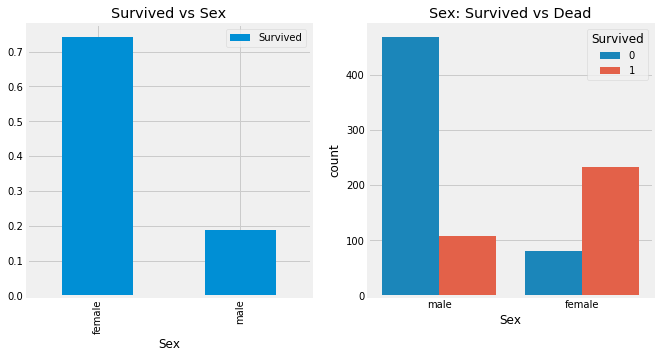

In [81]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

* 타이타닉 호의 승선한 남성의 수는 여성의 수보다 훨씬 많음에도 불구하고 여성의 생존율은 75%, 남성의 생존율은 약 18~19%임을 확인할 수 있다.

* 위의 결과를 보았을 때, 성별은 중요한 특성임을 파악할 수 있지만, 과연 이것만으로도 충분할까? 다른 특성도 확인해보자.

### Pclass -> Ordinal Feature

In [82]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='Oranges')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


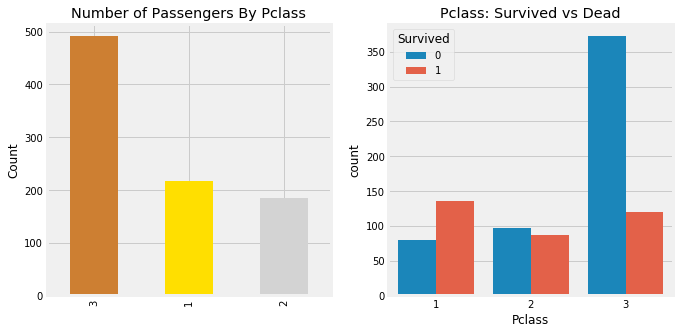

In [83]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

* Pclass 변수는 선실의 등급으로, 비행기 좌석의 클래스와 같은 개념이라고 생각하면 된다. Pclass 3의 승객 수가 가장 많지만 생존 비율을 확인했을 때, 구조 순서가 선실의 등급의 우선 순위가 부여되어 있음을 파악할 수 있다.

* Pclass 1의 생존율은 약 63%, Pclass 2의 생존율은 약 48%, Pclass 3의 생존율은 약 25%를 보이고 있다.

* 다른 특성들도 더 파악해보기 전에 Sex와 Pclass를 함께 살펴보자.

In [84]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='Oranges')

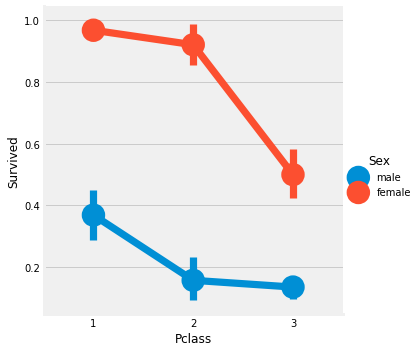

In [85]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

* FactorPlot을 사용하여 범주형 변수를 쉽게 분리할 수 있다.

* 위의 그래프를 통해 Pclass 1에서 94명의 여성 중 3명만이 사망한 것처럼 Pclass 1 여성의 생존율은 약 95~96%임을 파악할 수 있다.

* Pclass 1의 남성의 생존율이 낮은 것을 보아, 여성에게 최우선 구조 순위가 부여됨을 확인할 수 있다.

### Age -> Continous Feature

In [86]:
print('가장 늙은 사람의 나이: {:.2f}'.format(data['Age'].max()), '세')
print('가장 어린 사람의 나이: {:.2f}'.format(data['Age'].min()), '세')
print('평균 나이: {:.2f}'.format(data['Age'].mean()), '세')

가장 늙은 사람의 나이: 80.00 세
가장 어린 사람의 나이: 0.42 세
평균 나이: 29.70 세


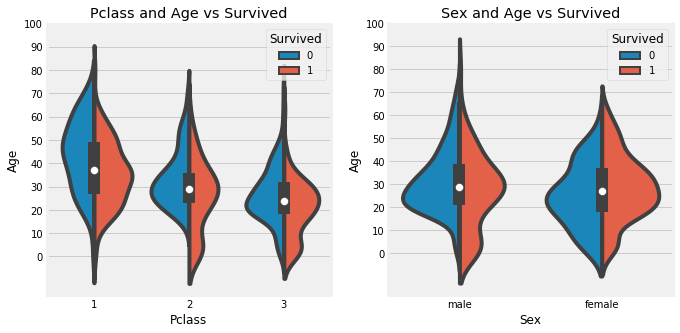

In [87]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

그래프를 통해 확인할 수 있는 점(Pclass와 Age의 생존율, Sex와 Age의 생존율)
* Pclass의 경우, 10세 미만의 어린이의 생존율이 양호해 보인다.  
* Pclass1에서 20-50세의 승객의 생존율이 높고, 여성의 경우 남성보다 생존율이 더 높다.  
* 남성의 경우 생존율은 나이가 증가할 수록 감소함을 보인다.  

앞에서 살펴본 것처럼, Age의 특성은 177개의 결측치를 가지고 있다. NaN 값을 대체하기 위해선 데이터셋의 평균 나이로 할당할 수 있다.

하지만, 연령층이 높은 사람들이 꽤 많다는 것을 알 수 있다. 때문에 실제 4살의 아이를 평균 연령 29살로 할당하는 것은 바람직하지 않다. 그렇다면 어떻게 승객이 어떤 연령대인지를 확인할 수 있을까?

정답은 바로 이름에서 힌트를 얻을 수 있다. 이름에는 Mr. 또는 Mrs.와 같은 호칭이 붙어있기에 이 평균값을 각 그룹에 할당할 수 있다.

In [88]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

위의 코드에서 정규표현식을 사용하여 이름의 A-Z 또는 a-z 사이에 있고, .(점)이 있는 문자열을 추출하는 것이다. 따라서 이름에서 호칭을 성공적으로 추출할 수 있다.

In [89]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='Oranges')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같은 맞춤법이 틀린 이니셜은 Miss를 의미하며, Dr의 경우 Mr로 변경할 수 있다.

In [90]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], 
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [91]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Age의 결측치 채우기

In [92]:
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [93]:
data['Age'].isnull().any()

False

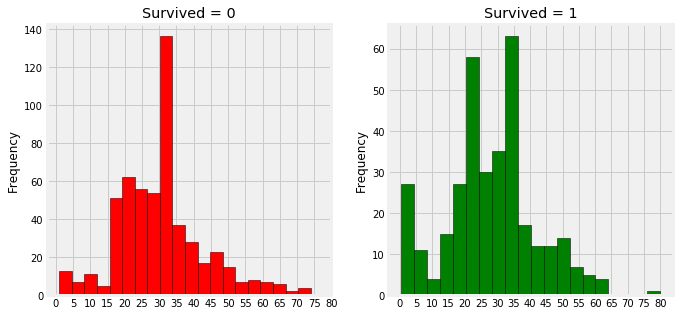

In [94]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data[data['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

* 나이가 5살 미만인 유아들이 많이 생존했음을 확인할 수 있다.
* 가장 나이가 많은 80세의 승객이 구해졌다.
* 생존하지 못한 승객의 연령 그룹은 30-40세가 가장 많다.

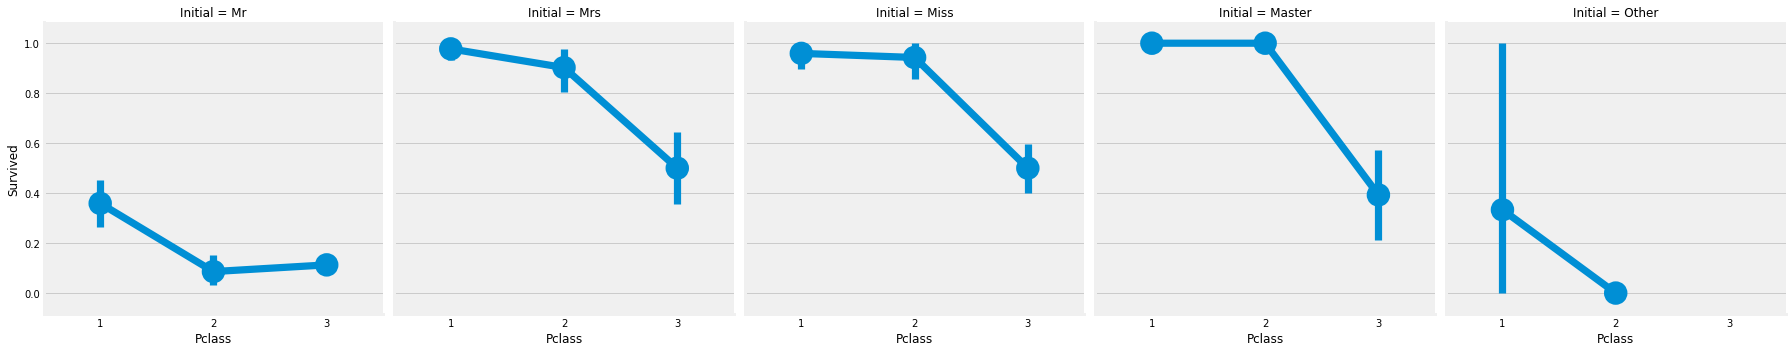

In [95]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

영화에서도 나왔듯이, 여성과 아이의 구조가 우선이라는 원칙이 그래프를 통해 입증할 수 있다.

### Embarked -> Categorical Value

In [96]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='Oranges')

승선 항의 위치에 따른 생존율

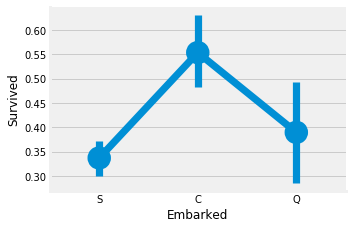

In [97]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C(Cherbourg) 승선 위치에서의 생존율은 55%로 가장 높으며, S(Southampton) 승선 위치에서의 생존율은 가장 낮다.

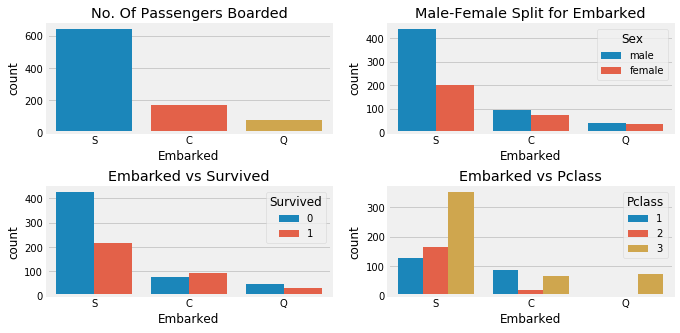

In [98]:
f, ax = plt.subplots(2, 2, figsize=(10, 5))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* S 승선 위치에서 온 대다수는 Pclass 3의 사람들이다.
* C 승선의 승객은 다른 위치에 비해 생존율이 높다. 아마도 Pclass 1의 비율이 높기 때문일 것이다.
* S 승선의 승객은 Pclass 3의 승객이 약 81%가 생존하지 못했기에 전체 생존율에서는 낮다.
* Q 승선의 승객은 95%가 Pclass 3의 사람들이다.

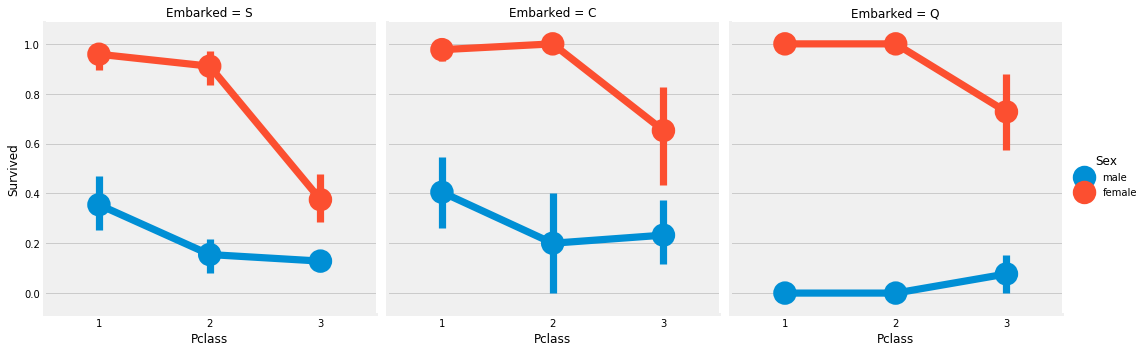

In [99]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

* Pclass와 상관없이 Pclass 1, Pclass 2의 여성의 생존 확률은 거의 1이다.
* S 승선의 승객들에서 Pclass 3의 승객들은 생존율이 매우 낮음을 볼 수 있다.
* Q 승선의 승객에서는 전체 남자들의 생존율이 매우 낮음을 볼 수 있다.

Embarked의 결측치 채우기

S 승선의 승객 수가 최대임을 보아, 결측치는 S로 대체하겠다.

In [100]:
data['Embarked'].fillna('S', inplace=True)

In [101]:
data['Embarked'].isnull().any()

False

### SibSp -> Discrete Feature

이 특성은 가족 구성원 수를 나타내는 것이다.  
* Sibling = 형제, 자매, 의붓형제, 이복 누이  
* Spouse = 남편, 아내  

In [102]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='Oranges')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


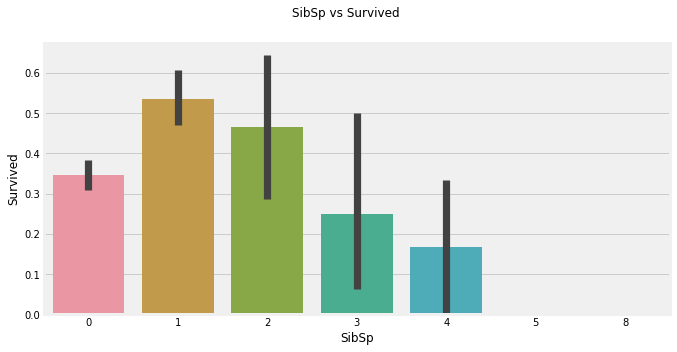

In [103]:
fig = plt.figure(figsize=(10, 5))
sns.barplot('SibSp', 'Survived', data=data)
fig.suptitle('SibSp vs Survived')

plt.close(2)
plt.show()

In [104]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='Oranges')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* 그래프를 통해 승객이 혼자 탑승한 경우 생존율이 34.5% 정도 되며, 형제 수가 증가할 수록 생존율이 줄어드는 것을 확인할 수 있다. 이는 말이 될 수 있는 것이, 가족이 있다면 나보다는 가족을 먼저 살리기 위해서 노력할 것이다.

* 놀라운 부분은 5-8인의 가족의 생존율은 0%이다. 이러한 이유는 무엇일까? 크로스탭으로 Pclass의 비율을 보면 형제 자매의 수가 3인을 초과하는 경우 모두 Pclass 3의 승객임을 알 수 있다. 즉, Pclass 3의 모든 대가족이 생존하지 못했다.

### Parch

함께 탑승한 부모, 자식의 수

In [105]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='Oranges')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭으로 Parch를 확인해보면 Pclass 3일 수록 더 많은 수의 인원이 있음을 확인할 수 있다.

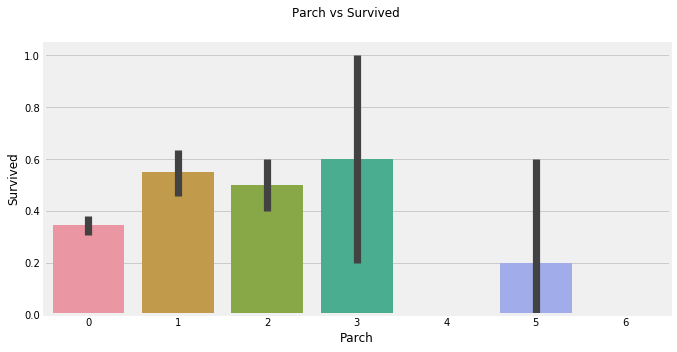

In [106]:
fig = plt.figure(figsize=(10, 5))
sns.barplot('Parch', 'Survived', data=data)
plt.suptitle('Parch vs Survived')
plt.close(2)
plt.show()

* 여기서도 결과가 비슷하다. 부모와 함께 탑승한 승객의 생존율이 더 높다. 그러나 숫자가 증가할 수록 생존율이 낮아진다.

* 1-3명의 부모가 있는 경우에 생존의 기회가 높아지지만, 혼자이거나 4명 이상의 부모가 있는 경우 생존율이 낮아진다.

### Fare -> Continous Feature

In [107]:
print('가장 비싼 운임료: {:.2f}'.format(data['Fare'].max()))
print('가장 싼 운임료: {:.2f}'.format(data['Fare'].min()))
print('평균 운임료: {:.2f}'.format(data['Fare'].mean()))

가장 비싼 운임료: 512.33
가장 싼 운임료: 0.00
평균 운임료: 32.20


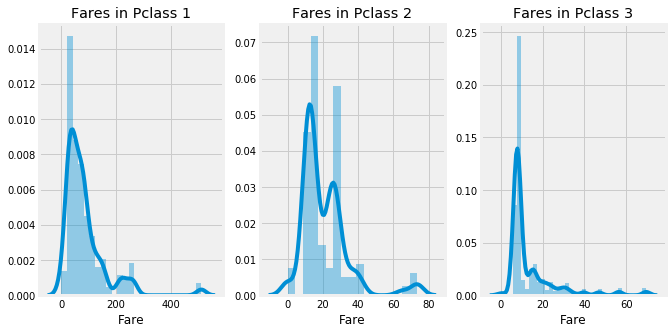

In [108]:
f, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.distplot(data[data['Pclass'] == 1]['Fare'], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2]['Fare'], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3]['Fare'], ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass 1의 승객들의 운임료를 보면 큰 분포가 있는 것으로 보인다. 그리고 이 분포는 표준이 감소함에 따라 줄어드는 것을 확인할 수 있다. 이러한 이산형 데이터는 Binning 기법을 사용하여 불연속값으로 변환할 수 있다.

* Binning: 대표적인 변수 가공(Feature Engineering) 기법 중의 하나로 수치형 변수를 범주형 변수로 변형하는 작업.
* 예를 들어, 직원의 나이에 따라 청소년(<20), 청년(20<30), 청장년(30<55), 장년(55>=) 등으로 구분하는 작업이 binning 기법이다.

### 모든 특성에 대한 요약
* #### Sex: 여성의 생존율이 남성에 비해 높음
* #### Pclass: 1등석 승객이 더 생존율이 높음. 여성의 경우 1등석의 생존율은 거의 1이며, 2등석 역시 매우 높음.
* #### Age: 5-10세 미만의 어린이는 생존율이 높음. 15-35세 그룹의 승객의 사망자 수가 높음.
* #### Embarked: C 승선 위치에서의 생존율이 S 승선 위치에서의 1등석 승객의 생존율 보다 높은 것으로 보임. Q 승선 위치의 대다수 승객은 3등석임.
* #### Parch + SibSp: 1-2명의 형제 자매, 배우자 또는 1-3명의 부모님이 있는 경우 혼자거나 대가족에 비해 생존율이 높음.

### 특성간의 상관관계

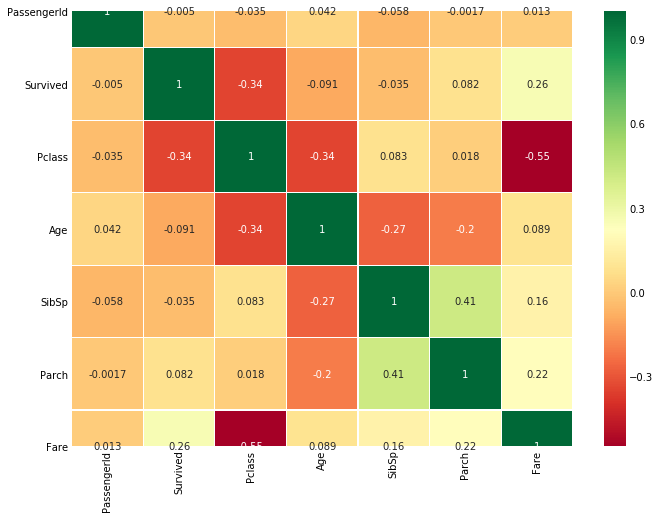

In [109]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### 히트맵 해석
* 양의 상관관계: 특성 A가 증가할 때, 특성 B도 증가한다면 양의 상관관계
* 음의 상관관계: 특성 A가 증가할 때, 특성 B가 감소한다면 음의 상관관계

만약 두개의 특성이 서로 상관관계가 있다면, 두 특성 모두 매우 유사한 정보를 포함하고 있다는 것을 의미한다. 이렇게 동일한 정보를 포함하는 특성이 많은 경우를 다중공선성이라 한다.

따라서 특성이 중복되므로 제거를 통해 모델링하거나 훈련하는 시간을 줄일 수 있다. 위의 히트맵에서는 다중공선성은 확인되지 않으며, 가장 높은 상관관계는 SibSp와 Parch라고 할 수 있다.

## 파트2: Feature Engineering 및 데이터 정제

Feature Engineering이란? 모든 특성이 데이터셋에서 중요하지는 않다. 제거해야 할 중복 특성이 많이 있을 수 있다. 또한, 다른 특성에서 정보를 추출하여 새로운 특성을 만들어 추가할 수도 있다. 이러한 과정을 Feature Engineering이라 한다.

### Age_band

* Age의 특성이 가지고 있는 문제: Age는 연속형 변수로 머신러닝 모델에서 사용하기에 부적합하다. 만약 나이별로 그룹화를 하고자 한다면, 나이의 기준을 잡아서 범주형 변수로 변환하는 것이 옳을 것이다.

* Binning 기법 사용: 승객의 최대 연령은 80세이기 때문에 0-80에서 5 bin으로 범위를 나눈다. 따라서 80 / 5 = 16이 구간별 크기이다.

In [110]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4

In [111]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='Oranges')

,Age_band
1,382
2,325
0,104
3,69
4,11


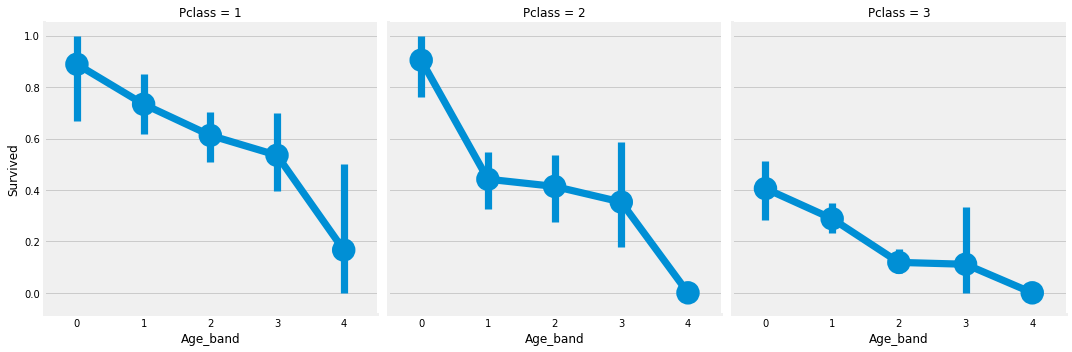

In [112]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

Pclass와 상관없이 나이가 증가함에 따라 생존율이 감소함을 볼 수 있다.

### Family_Size and Alone

새로운 특성인 'Family_Size'와 'Alone'을 추가하여 분석해보자. 이 특성들은 Parch와 SibSp 특성의 요약으로, 생존율이 승객의 가족 규모와 관련이 있는지 확인해볼 수 있는 데이터가 된다.

In [113]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size']==0, 'Alone'] = 1

<Figure size 720x360 with 0 Axes>

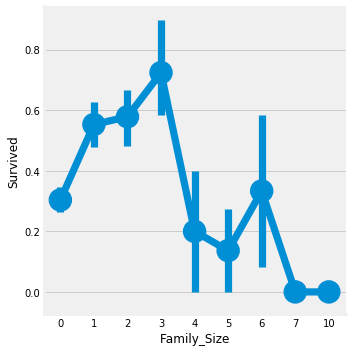

In [114]:
f = plt.figure(figsize=(10, 5))
sns.factorplot('Family_Size', 'Survived', data=data)
f.suptitle('Family_Size vs Survived')
plt.show()

<Figure size 720x360 with 0 Axes>

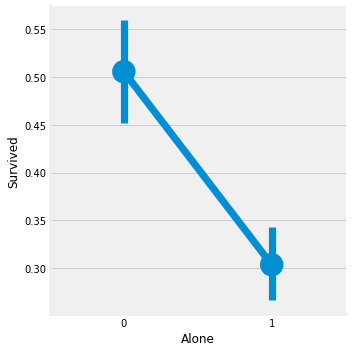

In [115]:
g = plt.figure(figsize=(10, 5))
sns.factorplot('Alone', 'Survived', data=data)
g.suptitle('Alone vs Survived')
plt.show()

Family_Size가 0인 경우는 승객이 혼자임을 의미한다. 위의 그래프를 통해서 만약 승객이 혼자이거나 가족의 수가 0이라면, 생존율이 매우 낮음을 확인할 수 있다. 마찬가지로 가족의 수가 4보다 크면, 생존율도 낮아진다. 이러한 결과를 통해 Faimily_Size는 매우 중요한 특성이라고 할 수 있다.

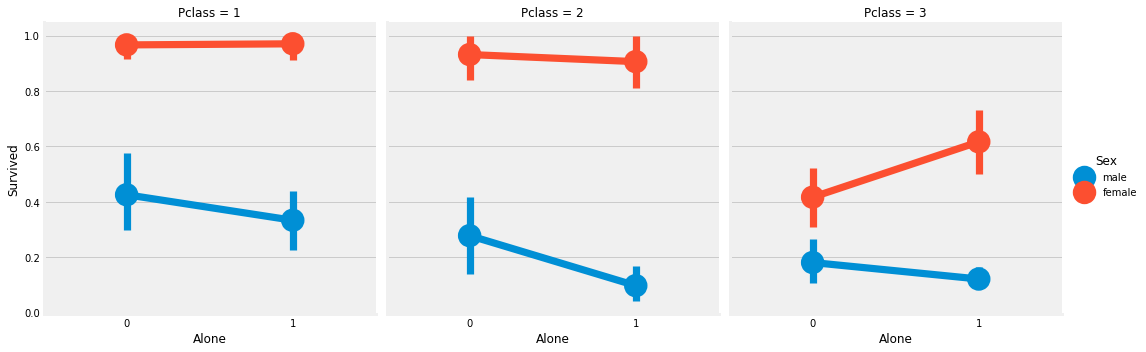

In [116]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

Pclass 3에서 여성 승객을 제외하고는 Sex와 Pclass와 상관없이 Alone인 경우에는 생존율이 낮아짐을 확인할 수 있다.

### Fare_Range
운임료는 연속형 변수로, 순서형 변수로 변환해야 한다. 이를 위해 pandas에서 제공하는 qcut 메소드를 사용할 수 있다.

qcut는 bins의 값에 따라 분할하거나 정렬한다. 그래서 만약 5 bins로 설정하였다면, 5개의 구간 또는 범위에 동일한 간격으로 값이 정렬된다.

In [117]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='Oranges')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


앞서 살펴본 결과들을 토대로, 운임료가 증가할 수록 생존율이 높아짐을 확인할 수 있다. 하지만 이제 Fare_Range의 값을 그대로 사용할 수 없기에, Age_Band와 같이 범주형 변수로 변환을 해야한다.

In [118]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

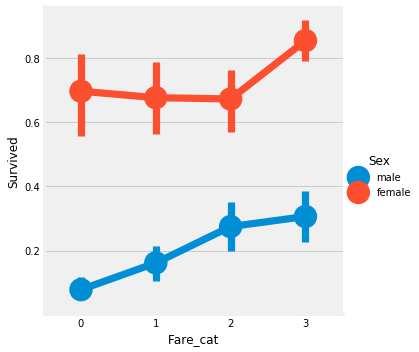

In [119]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

이로써 확실히 운임료가 증가할 수록, 생존율이 높아짐이 자명하다. 이는 Sex와 함께 모델링을 하는데 중요한 특성이 될 것이다.

### 문자열 변수를 수치형 변수로 변환
머신러닝 모델을 만들기 위해선, Sex, Embarked 등 문자열 변수를 수치형 변수로 변환을 해야만 한다.

In [120]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

In [121]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### 필요없는 특성 제거하기
* Name -> 범주형 변수로 변환할 수 없기 때문에 제거
* Age -> Age_band 변수가 있기 때문에 제거
* Ticket -> 무작위로 생성되는 문자열 변수이므로 제거
* Fare -> Fare_cat 변수가 있기 때문에 제거
* Cabin -> 결측치가 많으며 많은 승객에는 여러 개의 객실이 있는 것은 당연하므로 제거
* Fare_Range -> Fare_cat 변수가 있기 때문에 제거
* PassengerId -> 범주형 변수로 변환할 수 없기 때문에 제거

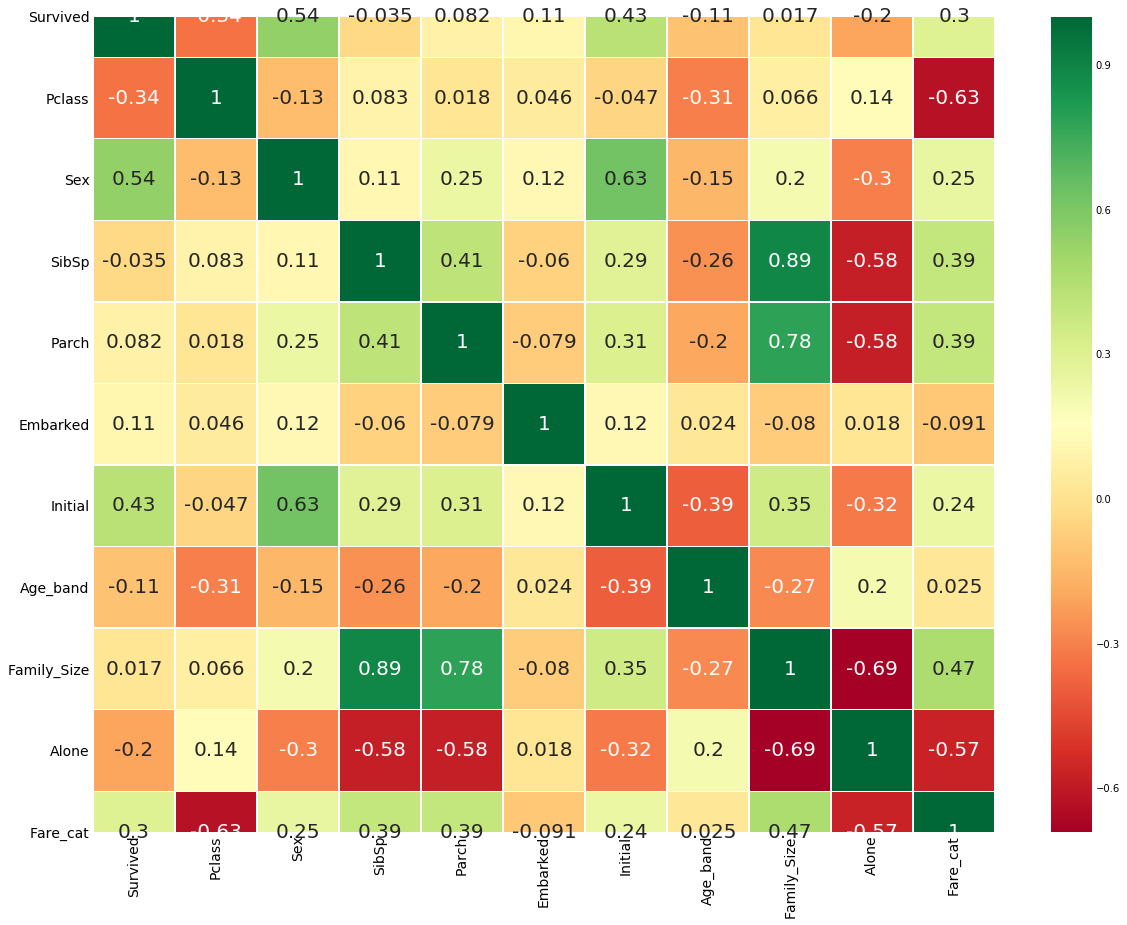

In [122]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관관계에 대한 히트맵을 보았을 때, **SibSp**와 **Family_Size**, **Parch**와 **Family_Size**간의 양의 상관관계를 볼 수 있고, **Alone**과 **Family_Size**간의 음의 상관관계를 확인할 수 있다.

## 파트3: 모델링 예측
우리는 EDA에서 데이터에 대한 통찰력을 얻었다. 그러나 아직까지는 승객의 생존율을 정확하게 예측할 수는 없다. 이제 머신러닝의 분류 알고리즘을 사용하여 승객의 생존율을 예측해보자.

*** 1)Logistic Regression ***  

*** 2)Support Vector Machines(Linear and radial) ***

*** 3)Random Forest ***

*** 4)K-Nearest Neighbours ***

*** 5)Naive Bayes ***

*** 6)Decision Tree ***

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [124]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

### rbf-SVM

In [125]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)

prediction1 = model.predict(test_X)
print('Accuracy for rbf-SVM is {}'.format(metrics.accuracy_score(prediction1, test_Y)))

Accuracy for rbf-SVM is 0.835820895522388


### linear-SVM

In [126]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)

prediction2 = model.predict(test_X)
print('Accuracy for linear-SVM is {}'.format(metrics.accuracy_score(prediction2, test_Y)))

Accuracy for linear-SVM is 0.8171641791044776


### Logistic Regression

In [127]:
model = LogisticRegression()
model.fit(train_X, train_Y)

prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is {}'.format(metrics.accuracy_score(prediction3, test_Y)))

Accuracy for Logistic Regression is 0.8171641791044776


### Decision Tree

In [128]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is {}'.format(metrics.accuracy_score(prediction4, test_Y)))

Accuracy for Decision Tree is 0.8059701492537313


### K-Nearest Neighbors

In [129]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)

prediction5 = model.predict(test_X)
print('Accuracy for KNN is {}'.format(metrics.accuracy_score(prediction5, test_Y)))

Accuracy for KNN is 0.832089552238806


K-Nearest Neighbors 알고리즘은 n_neighbors 속성에 따라 값이 변하기 때문에 다른 값들도 확인해보자.

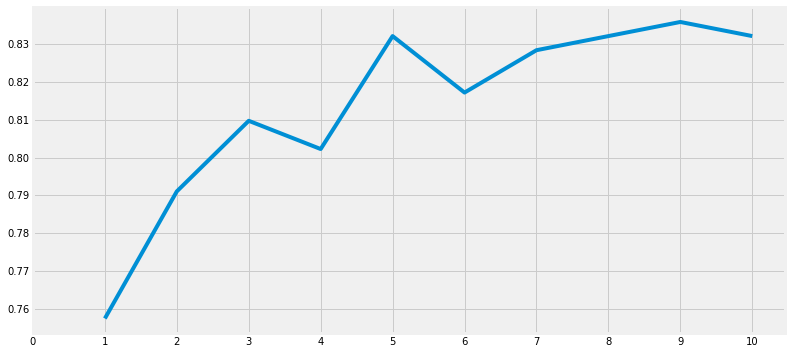

Accuracy for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [130]:
a_index = list(range(1, 11))
a = pd.Series()
x = np.arange(11)

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracy for different values of n are: {} with the max value as {}'.format(a.values, a.values.max()))

### Gaussian Naive Bayes

In [131]:
model = GaussianNB()
model.fit(train_X, train_Y)

prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes is {}'.format(metrics.accuracy_score(prediction6, test_Y)))

Accuracy for NaiveBayes is 0.8134328358208955


### Random Forest

In [132]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)

prediction7 = model.predict(test_X)
print('Accuracy for Random Forest is {}'.format(metrics.accuracy_score(prediction7, test_Y)))

Accuracy for Random Forest is 0.8171641791044776


모델의 정확성이 분류의 척도를 결정하는 유일한 요인은 아니다. 또한, 테스트셋이 변경되면 정확도도 변경된다. 이를 극복하고 일반화된 모델을 얻기 위해 **교차 검증(Cross Validation)**을 사용한다.

## 교차 검증
#### K-Fold Cross Valildation
* 데이터셋을 k-subset으로 나눈다.
* 만약 k=5로 설정한다면, 테스트를 위한 1개의 파트를 예약하고, 나머지 4개의 파트는 훈련을 위해 사용한다.
* 각 반복에서 테스트 파트를 변경하고 다른 파트에 대해 알고리즘을 훈련시켜 프로세스를 반복한다. 그런 다음 정확도와 오차의 평균을 구하여 알고리즘의 평균 정확도를 얻는다.
* 알고리즘은 일부 훈련셋을 위한 데이터셋에 과소적합할 수 있고, 때때로 다른 데이터셋에는 과대적합이 될 수 있다. 그러므로 교차 검증을 통해 일반화된 모델을 얻을 수 있다.

In [133]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22)
mean = []
acc = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Navie Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
   
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    acc.append(cv_result)
    
new_models_dataframe = pd.DataFrame({'CV Mean': mean, 'Std': std}, index=classifiers)
new_models_dataframe

,CV Mean,Std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.807004,0.029701
Navie Bayes,0.801386,0.028999
Random Forest,0.811498,0.032505


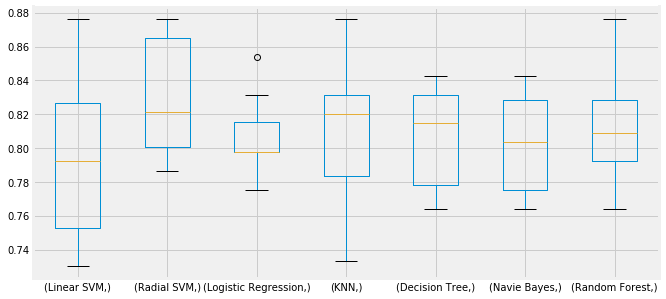

In [134]:
plt.subplots(figsize=(10, 5))
box = pd.DataFrame(acc, index=[classifiers])
box.T.boxplot()

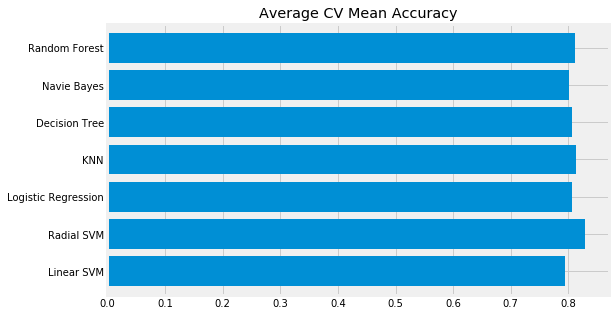

In [135]:
new_models_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

데이터셋의 분균형으로 인해 분류 정확도가 잘못될 수 있다. 오차 행렬(Confusion Matrix)은 모델이 어디서 잘못되었는지 혹은 잘못 예측한 클래스가 어디인지를 확인할 수 있다.

## 오차 행렬(Confusion Matrix)

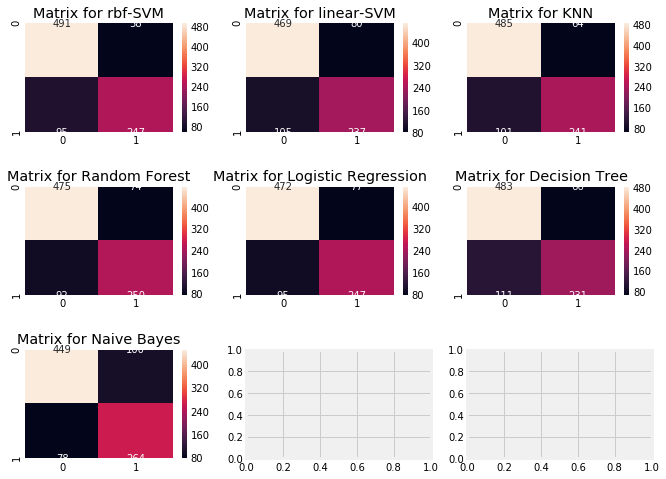

In [136]:
f, ax = plt.subplots(3, 3, figsize=(10, 8))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random Forest')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

* 왼쪽 대각행렬은 각 클래스에 대한 올바른 예측 수를 나타내고, 오른쪽 대각행렬은 잘못된 예측 수를 나타낸다.
* rbf-SVM은 사망한 승객을 정확하게 예측했지만, Naive-Bayes는 생존한 승객을 정확하게 예측했다.

## Hyper-Parameter Tuning
각 모델마다 설정할 수 있는 파라미터 값이 있는데 이 값들을 조정할 때마다 모델의 성능이 바뀐다. 이를 조정하는 것이 hyper-parameter tuning이라 한다.

가장 잘 분류된 SVM과 RandomForest 모델만 하이퍼파라미터 조정을 해보자.

### SVM

In [137]:
from sklearn.model_selection import RandomizedSearchCV

C = np.arange(0.5, 1.5, 0.5)
gamma = np.arange(0.1, 2.0, 1.0)
kernel = ['rbf', 'linear']

hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}

rand_search = RandomizedSearchCV(estimator=svm.SVC(), param_distributions=hyper, verbose=True, n_jobs=-1)
rand_search.fit(X, Y)

print(rand_search.best_score_)
print(rand_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished


### Random Forest

In [138]:
n_estimators = range(100, 1000, 100)

hyper = {'n_estimators': n_estimators}

rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), param_distributions=hyper, verbose=True, n_jobs=-1)
rand_search.fit(X, Y)

print(rand_search.best_score_)
print(rand_search.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   13.3s finished


rbf-SVM의 최고 점수는 C=1.0, gamma=0.1인 82.82%를 획득하였고, Random Forest의 최고 점수는 n_estimators=300으로 81.9%를 획득하였다.

## 앙상블 기법(Ensembling)

앙상블 기법은 모델의 정확도와 성능을 높이기 위한 좋은 방법이다. 간단히 설명하자면, 다양한 모델들을 결합하여 하나의 강력한 모델을 만드는 방법이다.

1) Voting Classifier  

2) Bagging  

3) Boosting  

### Voting Classifier

투표 기반 분류기는 2가지 방식이 있다.
* Hard Voting Classifier: 여러 모델을 생성하고 그 결과를 비교한다. 이 결고들을 집계하여 가장 많은 표를 얻은 클래스를 최종 예측값으로 정하는 방식이다.
* Soft Voting Classifier: 앙상블에 사용되는 모든 뷴류기가 클래스의 확률을 예측할 수 있을 때 사용한다. 각 분류기의 예측을 평균 내어 확률이 가장 높은 클래스로 예측하는 방식이다(확률).

In [139]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                        ('RBF', svm.SVC(probability=True, kernel='rbf', C=1.0, gamma=0.1)),
                                        ('Lin', svm.SVC(probability=True, kernel='linear')),
                                        ('RFor', RandomForestClassifier(n_estimators=300, random_state=0)),
                                        ('LR', LogisticRegression(C=0.05)),
                                        ('DT', DecisionTreeClassifier(random_state=0)),
                                        ('NB', GaussianNB())], voting='soft').fit(train_X, train_Y)

print('Accuracy for ensembled model is {}'.format(ensemble.score(test_X, test_Y)))
print('Cross Validated score for ensembled model is {}'.format(cross_val_score(ensemble, X, Y, cv=10, scoring='accuracy').mean()))

Accuracy for ensembled model is 0.8208955223880597
Cross Validated score for ensembled model is 0.8249148791283624


### Bagging
* 배깅은 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계하는 방법이다. 대부분의 알고리즘의 학습에서는 높은 bias로 인한 과소적합과 높은 variance로 인한 과대적합이 나타나는 오류가 생긴다. 
* 이러한 오류들을 줄이고, 알고리즘의 안정성과 정확성을 향상시키기 위해 표본을 추출하고 그 표본으로부터 평균을 추정하여 전체의 분포를 예측한다.

*KNeighbors, DecisionTree, RandomForest*

#### Bagged KNN

In [140]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('Accuracy for bagged KNN is {}'.format(metrics.accuracy_score(prediction, test_Y)))
print('Cross Validated score for bagged KNN is {}'.format(cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean()))

Accuracy for bagged KNN is 0.835820895522388
Cross Validated score for bagged KNN is 0.8148893428668709


#### Bagged DecisionTree

In [141]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('Accuracy for bagged Decision Tree is {}'.format(metrics.accuracy_score(prediction, test_Y)))
print('Cross Validated score for bagged Decision Tree is {}'.format(cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean()))

Accuracy for bagged Decision Tree is 0.8246268656716418
Cross Validated score for bagged Decision Tree is 0.8204826353421859


### Boosting

* 부스팅은 뷴류기의 순차적 학습을 사용하여 약한 성능의 모델을 단계별로 향상시키는 방법이다. 배깅이 일반적인 모델을 만드는데 집중되어 있다면, 부스팅은 맞추기 어려운 문제를 맞추는 데 초점이 되어있다.
* 모델은 먼저 전체 데이터셋에 대해 학습한다. 틀리게 분류한 클래스에 대해 높은 가중치를 부여하고, 바르게 분류한 클래스에 대해 낮은 가중치를 부여한다.
* 다음 반복에서 학습되는 모델은 앞에서 설정된 가중치에 따라 다시 분류를 한다. 이를 단계적으로 학습하여 정확도를 높여준다.

*AdaBoost, XGBoost, GradientBoost, LightGBM*

#### AdaBoost(Adaptive Boosting)

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)

print('Cross Validated score for AdaBoost is {}'.format(cross_val_score(ada, X, Y, cv=10, scoring='accuracy').mean()))

Cross Validated score for AdaBoost is 0.8249526160481218


#### Stochatic Gradient Boosting

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)

print('Cross Validated score for Gradient Boosting is {}'.format(cross_val_score(grad, X, Y, cv=10, scoring='accuracy').mean()))

Cross Validated score for Gradient Boosting is 0.8182862331176939


#### XGBoost

In [144]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)

print('Cross Validated score for XGBoost is {}'.format(cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy').mean()))

Cross Validated score for XGBoost is 0.8183109181704686


LightGBM

In [145]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier(n_estimators=900, learning_rate=0.1)

print('Cross Validated score for LightGBM is {}'.format(cross_val_score(lgb, X, Y, cv=10, scoring='accuracy').mean()))

Cross Validated score for LightGBM is 0.8149270797866304


가장 정확도가 높은 모델은 AdaBoost이다. 하이퍼파라미터 튜닝을 해보자.

In [146]:
n_estimators = list(range(100, 1100, 100))
learning_rate = np.arange(0.05, 1.05, 0.05)

hyper = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

rand_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=hyper, verbose=True, n_jobs=-1)
rand_search.fit(X, Y)

print(rand_search.best_score_)
print(rand_search.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.8181818181818182
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished


In [147]:
from sklearn.model_selection import GridSearchCV

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True, n_jobs=-1)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.1min finished


### 가장 좋은 모델의 오차 행렬

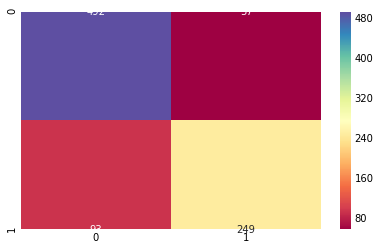

In [148]:
ada = gd.best_estimator_
result = cross_val_predict(ada, X, Y, cv=10)

sns.heatmap(confusion_matrix(Y, result), cmap='Spectral', annot=True, fmt='2.0f')
plt.show()

## 중요한 특징 추출

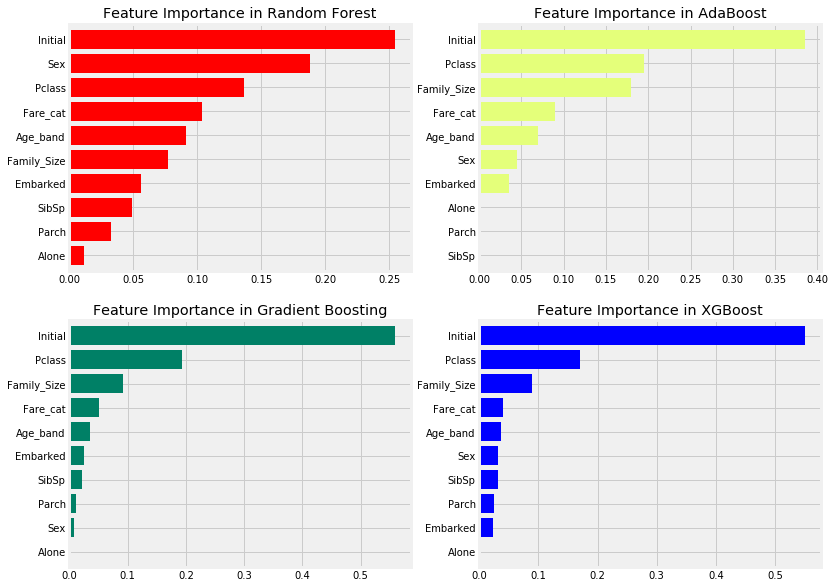

In [149]:
f, ax = plt.subplots(2, 2, figsize=(12, 10))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0], cmap='autumn')
ax[0, 0].set_title('Feature Importance in Random Forest')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], cmap='Wistia')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=900, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='summer')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], cmap='winter')
ax[1, 1].set_title('Feature Importance in XGBoost')

plt.show()

* 일반적인 중요한 특성은 Initial, Pclass, Fare_cat, Family_Size로 확인된다.
* 앞에서 Pclass와 결합된 Sex 특성이 좋았던 것에 비해, 이 그래프를 통해 Sex는 중요하지 않아 보인다. 즉, Sex 특성은 RandomForest에서만 중요한 특성인 것 같다.
* Initial은 앞서 Sex와의 상관관계를 보았으므로 성별을 나타내는 중요한 특성이다.
* Pclass 및 Fare_cat은 Alone, Parch, SibSp를 가진 승객 및 Family_Size의 상태를 나타낸다.

## 최적의 모델 결과 제출

In [150]:
data2 = pd.read_csv('C:/Users/battl/PycharmProjects/cse_project/coding practice/Kaggle/Titanic/test.csv')

In [151]:
test_Survived = pd.Series(result, name='Survived')
IDtest = data2['PassengerId']

result_dataframe = pd.concat([IDtest, test_Survived], axis=1)
result_dataframe.to_csv('EDA to prediction(dietanic) star6973.csv', index=False)